In [1]:
%matplotlib inline
import pandas as pd
import seaborn
from IPython.display import display, Markdown
import json
import requests
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
account = 'wri-rw'
carto_baseurl = 'http://{0}.carto.com'.format(account)


def query(sql):
    display(Markdown(">#### Sql applied:  "))
    display(Markdown(">>```sql {0}  ```".format(sql)))
    carto_sqlapi = carto_baseurl + '/api/v2/sql'
    payload = {"q": sql}
    r = requests.get(carto_sqlapi, params=payload)
    if r.status_code != 200:
        return print(r.json())
    else:
        return pd.read_json(json.dumps(r.json()['rows']), orient='records')

<a id="index"></a>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Global,-all-crops" data-toc-modified-id="Global,-all-crops-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Global, all crops</a></div><div class="lev2 toc-item"><a href="#groundwater-table-hot-spots,-the-top-5-irrigated-crops-at-risk" data-toc-modified-id="groundwater-table-hot-spots,-the-top-5-irrigated-crops-at-risk-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>groundwater table hot spots, the top 5 irrigated crops at risk</a></div><div class="lev2 toc-item"><a href="#drought-severity-soil,-the-top-5-irrigated-crops-at-risk" data-toc-modified-id="drought-severity-soil,-the-top-5-irrigated-crops-at-risk-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>drought severity-soil, the top 5 irrigated crops at risk</a></div><div class="lev2 toc-item"><a href="#Top-10-countries-with-highest-ag-water-stress-scores-(which-Tianyi-will-provide-this-week)" data-toc-modified-id="Top-10-countries-with-highest-ag-water-stress-scores-(which-Tianyi-will-provide-this-week)-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Top 10 countries with highest ag water stress scores (which Tianyi will provide this week)</a></div><div class="lev2 toc-item"><a href="#Top-10-countries-with-highest-ag-drought-severity-risk-scores-(which-Tianyi-will-provide-this-week)" data-toc-modified-id="Top-10-countries-with-highest-ag-drought-severity-risk-scores-(which-Tianyi-will-provide-this-week)-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Top 10 countries with highest ag drought severity risk scores (which Tianyi will provide this week)</a></div><div class="lev1 toc-item"><a href="#Global,-one-crop" data-toc-modified-id="Global,-one-crop-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global, one crop</a></div><div class="lev2 toc-item"><a href="#Top-5-10-net-importers-and-net-exporters" data-toc-modified-id="Top-5-10-net-importers-and-net-exporters-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Top 5-10 net importers and net exporters</a></div><div class="lev2 toc-item"><a href="#Yield,-area,-production,-price,-demand-change-over-time" data-toc-modified-id="Yield,-area,-production,-price,-demand-change-over-time-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Yield, area, production, price, demand change over time</a></div><div class="lev2 toc-item"><a href="#Top-5-countries-with-greatest-projected-irrigated-yield-increases-through-[future-selected-year]-(shaded-by-water-stress-risk)" data-toc-modified-id="Top-5-countries-with-greatest-projected-irrigated-yield-increases-through-[future-selected-year]-(shaded-by-water-stress-risk)-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Top 5 countries with greatest projected irrigated yield increases through [future selected year] (shaded by water stress risk)</a></div><div class="lev2 toc-item"><a href="#Top-5-countries-with-greatest-projected-rainfed-yield-increases-through-[future-selected-year]-(shaded-by-drought-severity-risk)" data-toc-modified-id="Top-5-countries-with-greatest-projected-rainfed-yield-increases-through-[future-selected-year]-(shaded-by-drought-severity-risk)-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Top 5 countries with greatest projected rainfed yield increases through [future selected year] (shaded by drought severity risk)</a></div><div class="lev2 toc-item"><a href="#Top-10-countries-with-highest-ag-water-stress-scores-(which-Tianyi-will-provide-this-week)" data-toc-modified-id="Top-10-countries-with-highest-ag-water-stress-scores-(which-Tianyi-will-provide-this-week)-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Top 10 countries with highest ag water stress scores (which Tianyi will provide this week)</a></div><div class="lev2 toc-item"><a href="#Top-10-countries-with-highest-ag-drought-severity-risk-scores-(which-Tianyi-will-provide-this-week)" data-toc-modified-id="Top-10-countries-with-highest-ag-drought-severity-risk-scores-(which-Tianyi-will-provide-this-week)-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Top 10 countries with highest ag drought severity risk scores (which Tianyi will provide this week)</a></div><div class="lev2 toc-item"><a href="#Top-5-crop-producing-countries-(by-level-of-production)-shaded-by-water-risk-score" data-toc-modified-id="Top-5-crop-producing-countries-(by-level-of-production)-shaded-by-water-risk-score-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Top 5 crop-producing countries (by level of production) shaded by water risk score</a></div><div class="lev2 toc-item"><a href="#Text-widget:" data-toc-modified-id="Text-widget:-28"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Text widget:</a></div><div class="lev1 toc-item"><a href="#Country,-all-crops" data-toc-modified-id="Country,-all-crops-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Country, all crops</a></div><div class="lev2 toc-item"><a href="#Top-5-irrigated-crops-by-level-of-production-that-are-grown-in-high-water-stress-areas" data-toc-modified-id="Top-5-irrigated-crops-by-level-of-production-that-are-grown-in-high-water-stress-areas-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Top 5 irrigated crops by level of production that are grown in high water stress areas</a></div><div class="lev2 toc-item"><a href="#Top-5-irrigated-crops-by-level-of-production-that-are-grown-in-groundwater-decline-hot-spots" data-toc-modified-id="Top-5-irrigated-crops-by-level-of-production-that-are-grown-in-groundwater-decline-hot-spots-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Top 5 irrigated crops by level of production that are grown in groundwater decline hot spots</a></div><div class="lev2 toc-item"><a href="#Top-5-rainfed-crops-by-level-of-production-that-are-grown-in-high-drought-severity-risk-areas" data-toc-modified-id="Top-5-rainfed-crops-by-level-of-production-that-are-grown-in-high-drought-severity-risk-areas-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Top 5 rainfed crops by level of production that are grown in high drought severity risk areas</a></div><div class="lev2 toc-item"><a href="#Change-in-net-trade-over-time-for-top-5-crops-in-highest-demand" data-toc-modified-id="Change-in-net-trade-over-time-for-top-5-crops-in-highest-demand-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Change in net trade over time for top 5 crops in highest demand</a></div><div class="lev1 toc-item"><a href="#Country,-one-crop" data-toc-modified-id="Country,-one-crop-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Country, one crop</a></div><div class="lev2 toc-item"><a href="#Yield,-area,-production,-price,-demand-change-over-time" data-toc-modified-id="Yield,-area,-production,-price,-demand-change-over-time-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Yield, area, production, price, demand change over time</a></div><div class="lev2 toc-item"><a href="#Change-in-net-trade-over-time" data-toc-modified-id="Change-in-net-trade-over-time-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Change in net trade over time</a></div><div class="lev2 toc-item"><a href="#Text-widget:" data-toc-modified-id="Text-widget:-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Text widget:</a></div>

# Global, all crops

<a id="global_all_crops_1"></a>
>## groundwater table hot spots, the top 5 irrigated crops at risk

>* hot spots: >2 cm/year in groundwater decline
>* Could show amount of production of crops that are at risk
>* Could show % of global crop production that is at risk (if number is significant)
>* Bar graph?

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## drought severity-soil, the top 5 irrigated crops at risk

>* “hot spots”: high or very high risk
>* Could show amount of production of crops that are at risk
>* Could show % of global crop production that is at risk (if number is significant)
>* Bar graph?

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Top 10 countries with highest ag water stress scores (which Tianyi will provide this week)

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Top 10 countries with highest ag drought severity risk scores (which Tianyi will provide this week)

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

***

# Global, one crop

>## Top 5-10 net importers and net exporters

>#### Sql applied: 

>>```sql 
with data as (SELECT *
FROM combined01_prepared
WHERE year = 2005 and impactparameter = 'Net trade' and scenario = 'SSP2-MIRO' and commodity='All Cereals' order by value)
(SELECT *
FROM data
order by value desc limit 5)
union all
(SELECT *
FROM data
order by value asc limit 5)
                     ```

,cartodb_id,commodity,gcm_type,impactparameter,irrigation,iso,region,scenario,the_geom,the_geom_webmercator,value,year
0,259879,All Cereals,miro,Net trade,,USA,USA,SSP2-MIRO,NaN,NaN,81917.585938,2005
1,260167,All Cereals,miro,Net trade,,FRA,France,SSP2-MIRO,NaN,NaN,29196.542969,2005
2,259903,All Cereals,miro,Net trade,,ARG,Argentina,SSP2-MIRO,NaN,NaN,21170.955078,2005


(10, 12)

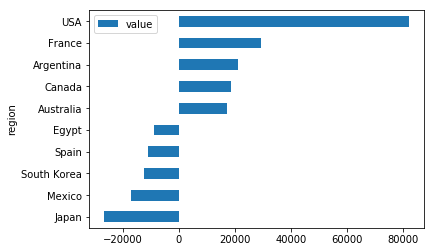

In [27]:
sql = '''
with data as (SELECT *
FROM combined01_prepared
WHERE year = 2005 and impactparameter = 'Net trade' and scenario = 'SSP2-MIRO' and commodity='All Cereals' order by value)
(SELECT *
FROM data
order by value desc limit 5)
union all
(SELECT *
FROM data
order by value asc limit 5)
'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.sort_values('value').plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>


>## Yield, area, production, price, demand change over time

>* Line graph with separate-colored lines for each IFPRI dataset
>* % change on y-axis; time on x-axis

>#### Sql applied: 

>>```sql 
WITH data as (
    SELECT impactparameter, sum(value) as value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Food Demand','Yield','Area', 'Production', 'World price') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    GROUP BY impactparameter, year
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
                     ```

,impactparameter,value,year
0,Area,0.000000,2005
1,Food Demand,0.000000,2005
2,Production,0.000000,2005
3,World price,0.000000,2005
4,Yield,0.000000,2005
5,Area,4.073071,2010


(30, 3)

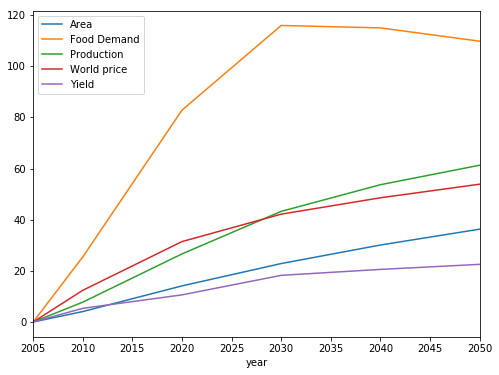

In [20]:
sql = '''
WITH data as (
    SELECT impactparameter, sum(value) as value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Food Demand','Yield','Area', 'Production', 'World price') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    GROUP BY impactparameter, year
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
'''
dataset = query(sql)
display(dataset.head(6))
display(dataset.shape)
fig, ax = plt.subplots(figsize=(8,6))
for label, df in dataset.groupby('impactparameter'):
    df.plot(kind="line", ax=ax, label=label, x='year', y = 'value')
plt.legend();

<div style="text-align: right"> [return index](#index) </div>

>## Top 5 countries with greatest projected irrigated yield increases through [future selected year] (shaded by water stress risk)

>#### Sql applied: 

>>```sql 
WITH data as (
    SELECT impactparameter, value, year, region
    FROM combined01_prepared
    WHERE impactparameter  in ('Yield') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    AND irrigation = 'irrigated'
    AND year in (2005, 2050)
    ORDER BY year ASC),
    baseline AS (
    SELECT region, impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.region, data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter and data.region=baseline.region
order by value desc limit 5
                     ```

,impactparameter,region,value,year
0,Yield,Uruguay,139.050508,2050
1,Yield,Argentina,79.118605,2050
2,Yield,Russia,73.999569,2050


(5, 4)

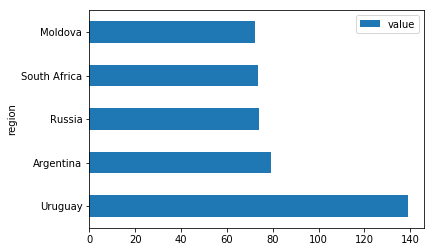

In [24]:
sql = '''
WITH data as (
    SELECT impactparameter, value, year, region
    FROM combined01_prepared
    WHERE impactparameter  in ('Yield') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    AND irrigation = 'irrigated'
    AND year in (2005, 2050)
    ORDER BY year ASC),
    baseline AS (
    SELECT region, impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.region, data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter and data.region=baseline.region
order by value desc limit 5
'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

***

>## Top 5 countries with greatest projected rainfed yield increases through [future selected year] (shaded by drought severity risk)

>#### Sql applied: 

>>```sql 
WITH data as (
    SELECT impactparameter, value, year, region
    FROM combined01_prepared
    WHERE impactparameter  in ('Yield') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    AND irrigation = 'rainfed'
    AND year in (2005, 2050)
    ORDER BY year ASC),
    baseline AS (
    SELECT region, impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.region, data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter and data.region=baseline.region
order by value desc limit 5
                     ```

,impactparameter,region,value,year
0,Yield,Mali,90.286893,2050
1,Yield,Germany,90.204620,2050
2,Yield,Slovenia,80.495688,2050


(5, 4)

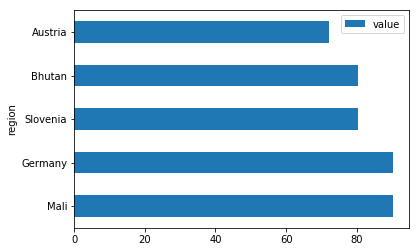

In [26]:
sql = '''
WITH data as (
    SELECT impactparameter, value, year, region
    FROM combined01_prepared
    WHERE impactparameter  in ('Yield') 
    AND scenario = 'SSP2-MIRO' 
    AND commodity='Soybean' 
    AND irrigation = 'rainfed'
    AND year in (2005, 2050)
    ORDER BY year ASC),
    baseline AS (
    SELECT region, impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.region, data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter and data.region=baseline.region
order by value desc limit 5
'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Top 10 countries with highest ag water stress scores (which Tianyi will provide this week)

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Top 10 countries with highest ag drought severity risk scores (which Tianyi will provide this week)

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Top 5 crop-producing countries (by level of production) shaded by water risk score

>> * Have bars for each water risk indicator for which we have aggregate country scores

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>

>## Text widget:

>> On average, groundwater tables have declined by x% in areas where [crop] is grown since 1990.  
>> On average, risk of water stress will increase in areas where [crop] is grown by x% through [future year selected].  
>> On average, risk of seasonal variability will increase in areas where [crop] is grown by x% through [future year selected].


In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
text="""
On average, groundwater tables have declined by {value1}% in areas where {crop} is grown since 1990.  

On average, risk of water stress will increase in areas where {crop} is grown by {value2}% through {year}.  

On average, risk of seasonal variability will increase in areas where {crop} is grown by {value3}% through {year}.
"""
Markdown(text.format(value1=,value2=, value3= ,year=,crop=));

<div style="text-align: right"> [return index](#index) </div>

***

# Country, all crops

>## Top 5 irrigated crops by level of production that are grown in high water stress areas

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>


>## Top 5 irrigated crops by level of production that are grown in groundwater decline hot spots

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>


>## Top 5 rainfed crops by level of production that are grown in high drought severity risk areas

In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
dataset.plot.barh(y='value', x='region');

<div style="text-align: right"> [return index](#index) </div>


>## Change in net trade over time for top 5 crops in highest demand

>#### Sql applied: 

>>```sql 
WITH top as (
    select max(value),  commodity 
    from combined01_prepared 
    where iso = 'ESP' AND scenario = 'SSP2-MIRO' and impactparameter = 'Food Demand' 
    group by commodity order by max desc limit 5
),
data as (
    SELECT commodity, value, year
    FROM combined01_prepared
    WHERE impactparameter = 'Net trade'
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'ESP' 
    AND commodity in (select commodity from top) 
    ORDER BY year ASC),
baseline AS (
    SELECT commodity, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.commodity, 100*((value-baseline.baseline)/baseline.baseline) as value, value as raw, year 
FROM data inner join baseline on data.commodity=baseline.commodity 
order by year asc, data.commodity asc
                     ```

,commodity,raw,value,year
0,All Cereals,-10934.788086,0.000000,2005
1,All Pulses,-1025.171265,0.000000,2005
2,Banana,-29.533503,0.000000,2005
3,Potato,-1214.660645,0.000000,2005
4,Wheat,-5020.781738,0.000000,2005
5,All Cereals,-12555.882812,14.825113,2010


(30, 4)

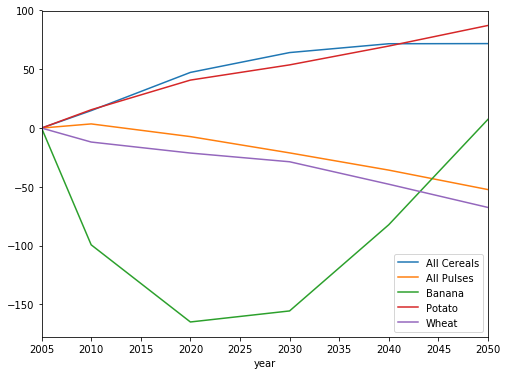

In [49]:
sql = '''
WITH top as (
    select max(value),  commodity 
    from combined01_prepared 
    where iso = 'ESP' AND scenario = 'SSP2-MIRO' and impactparameter = 'Food Demand' 
    group by commodity order by max desc limit 5
),
data as (
    SELECT commodity, value, year
    FROM combined01_prepared
    WHERE impactparameter = 'Net trade'
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'ESP' 
    AND commodity in (select commodity from top) 
    ORDER BY year ASC),
baseline AS (
    SELECT commodity, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.commodity, 100*((value-baseline.baseline)/baseline.baseline) as value, value as raw, year 
FROM data inner join baseline on data.commodity=baseline.commodity 
order by year asc, data.commodity asc
'''
dataset = query(sql)
display(dataset.head(6))
display(dataset.shape)
fig, ax = plt.subplots(figsize=(8,6))
for label, df in dataset.groupby('commodity'):
    df.plot(kind="line", ax=ax, label=label, x='year', y = 'value')
plt.legend();

<div style="text-align: right"> [return index](#index) </div>

***

# Country, one crop

>## Yield, area, production, price, demand change over time

>* Line graph with separate lines for each dataset?
>* % change on y-axis

>#### Sql applied: 

>>```sql 
WITH data as (
    SELECT impactparameter, sum(value) as value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Food Demand','Yield','Area', 'Production', 'World price') 
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'BRA' 
    AND commodity='Banana' 
    GROUP BY impactparameter, year
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
                     ```

,impactparameter,value,year
0,Area,0.000000,2005
1,Food Demand,0.000000,2005
2,Production,0.000000,2005
3,Yield,0.000000,2005
4,Area,12.129330,2010
5,Food Demand,7.386269,2010


(24, 3)

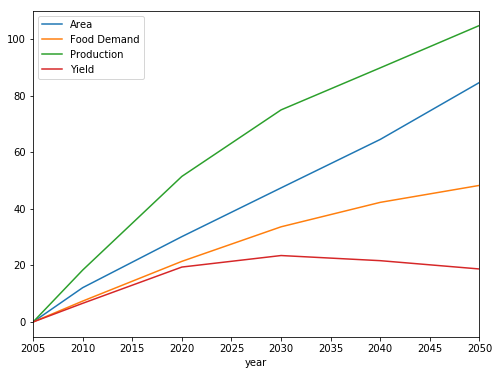

In [48]:
sql = '''
WITH data as (
    SELECT impactparameter, sum(value) as value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Food Demand','Yield','Area', 'Production', 'World price') 
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'BRA' 
    AND commodity='Banana' 
    GROUP BY impactparameter, year
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
'''
dataset = query(sql)
display(dataset.head(6))
display(dataset.shape)
fig, ax = plt.subplots(figsize=(8,6))
for label, df in dataset.groupby('impactparameter'):
    df.plot(kind="line", ax=ax, label=label, x='year', y = 'value')
plt.legend()

<div style="text-align: right"> [return index](#index) </div>


>## Change in net trade over time

>#### Sql applied: 

>>```sql 
WITH data as (
    SELECT impactparameter, value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Net trade') 
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'ESP' 
    AND commodity='Soybean' 
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, value as raw, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
                     ```

,impactparameter,raw,value,year
0,Net trade,-2471.730713,0.000000,2005
1,Net trade,-2479.403564,0.310424,2010
2,Net trade,-2487.455566,0.636188,2020
3,Net trade,-2525.162109,2.161700,2030
4,Net trade,-2547.566162,3.068111,2040
5,Net trade,-2567.186768,3.861912,2050


(6, 4)

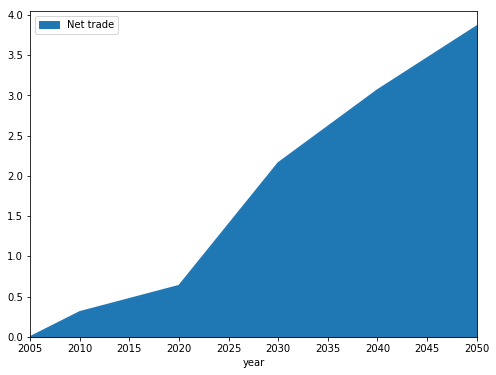

In [39]:
sql = '''
WITH data as (
    SELECT impactparameter, value, year
    FROM combined01_prepared
    WHERE impactparameter  in ('Net trade') 
    AND scenario = 'SSP2-MIRO' 
    AND iso = 'ESP' 
    AND commodity='Banana' 
    ORDER BY year ASC),
    baseline AS (
    SELECT impactparameter, value as baseline
    FROM data
    WHERE year =2005 
    order by year asc)
SELECT data.impactparameter, 100*((value-baseline.baseline)/baseline.baseline) as value, value as raw, year 
FROM data inner join baseline on data.impactparameter=baseline.impactparameter 
order by year asc, data.impactparameter asc
'''
dataset = query(sql)
display(dataset.head(6))
display(dataset.shape)
fig, ax = plt.subplots(figsize=(8,6))
for label, df in dataset.groupby('impactparameter'):
    df.plot(kind="area", ax=ax, label=label, x='year', y = 'value')
plt.legend()

<div style="text-align: right"> [return index](#index) </div>


>## Text widget:

>> “On average, groundwater tables have declined by x% in areas where [crop] is grown since 1990.”   
>> “On average, risk of water stress will increase in areas where [crop] is grown by x% through [future year selected].”  
>> “On average, risk of seasonal variability will increase in areas where [crop] is grown by x% through [future year selected].”


In [29]:
sql = '''

'''
dataset = query(sql)
display(dataset.head(3))
display(dataset.shape)
text="""
On average, groundwater tables have declined by {value1}% in areas where {crop} is grown since 1990.  

On average, risk of water stress will increase in areas where {crop} is grown by {value2}% through {year}.  

On average, risk of seasonal variability will increase in areas where {crop} is grown by {value3}% through {year}.
"""
Markdown(text.format(value1=,value2=, value3= ,year=,crop=));

<div style="text-align: right"> [return index](#index) </div>


<div style="text-align: right"> [return index](#index) </div>
